## Problem Statement
Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast Cancer occurs as a result of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound, and biopsy are commonly used to diagnose breast cancer performed.

## Expected outcome
Given breast cancer results from breast fine-needle aspiration (FNA) test (is a quick and simple procedure to perform, which removes some fluid or cells from a breast lesion or cyst (a lump, sore, or swelling) with a fine needle similar to a blood sample needle). Since this build a model that can classify a breast cancer tumor using two training classification:

- 1 = Malignant (Cancerous) - Present
- 0 = Benign (Not Cancerous) -Absent

## Data Source
The Breast Cancer datasets is available as machine learning repository maintained by the University of California, Irvine. The dataset contains 569 samples of malignant and benign tumor cells.

The data, in csv format, can be downloaded from this <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data">link</a>

## Getting Started: Load libraries and Datasets

In [19]:
## Import Libraries

import pickle
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [21]:
## Load Dataset
df = pd.read_csv("Final_dataset.csv")
df.head()

diagnosis  texture_mean  area_mean  concavity_mean  area_se  concavity_se  \
0         M         10.38     1001.0          0.3001   153.40       0.05373   
1         M         17.77     1326.0          0.0869    74.08       0.01860   
2         M         21.25     1203.0          0.1974    94.03       0.03832   
3         M         20.38      386.1          0.2414    27.23       0.05661   
4         M         14.34     1297.0          0.1980    94.44       0.05688   

   fractal_dimension_se  smoothness_worst  concavity_worst  symmetry_worst  \
0              0.006193            0.1622           0.7119          0.4601   
1              0.003532            0.1238           0.2416          0.2750   
2              0.004571            0.1444           0.4504          0.3613   
3              0.009208            0.2098           0.6869          0.6638   
4              0.005115            0.1374           0.4000          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [22]:
## In the result displayed, you can see the data has 569 records, each with 32 columns.
df.shape

(569, 11)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   texture_mean             569 non-null    float64
 2   area_mean                569 non-null    float64
 3   concavity_mean           569 non-null    float64
 4   area_se                  569 non-null    float64
 5   concavity_se             569 non-null    float64
 6   fractal_dimension_se     569 non-null    float64
 7   smoothness_worst         569 non-null    float64
 8   concavity_worst          569 non-null    float64
 9   symmetry_worst           569 non-null    float64
 10  fractal_dimension_worst  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


In [24]:
df.describe()

texture_mean    area_mean  concavity_mean     area_se  concavity_se  \
count    569.000000   569.000000      569.000000  569.000000    569.000000   
mean      19.289649   654.889104        0.088799   40.337079      0.031894   
std        4.301036   351.914129        0.079720   45.491006      0.030186   
min        9.710000   143.500000        0.000000    6.802000      0.000000   
25%       16.170000   420.300000        0.029560   17.850000      0.015090   
50%       18.840000   551.100000        0.061540   24.530000      0.025890   
75%       21.800000   782.700000        0.130700   45.190000      0.042050   
max       39.280000  2501.000000        0.426800  542.200000      0.396000   

       fractal_dimension_se  smoothness_worst  concavity_worst  \
count            569.000000        569.000000       569.000000   
mean               0.003795          0.132369         0.272188   
std                0.002646          0.022832         0.208624   
min                0.000895          0.071170         0.000000   
25%                0.002248          0.116600         0.114500   
50%                0.003187          0.131300         0.226700   
75%                0.004558          0.146000         0.382900   
max                0.029840          0.222600         1.252000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500

## Exploratory Data Analysis

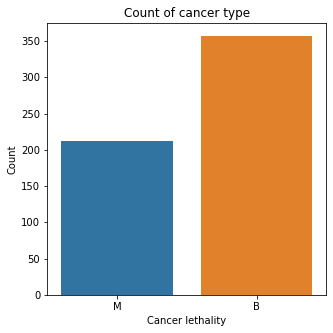

In [25]:
plt.figure(figsize=(5,5))
plt.title('Count of cancer type')
sns.countplot(df["diagnosis"],label='Count')
plt.xlabel('Cancer lethality')
plt.ylabel('Count')
plt.show()

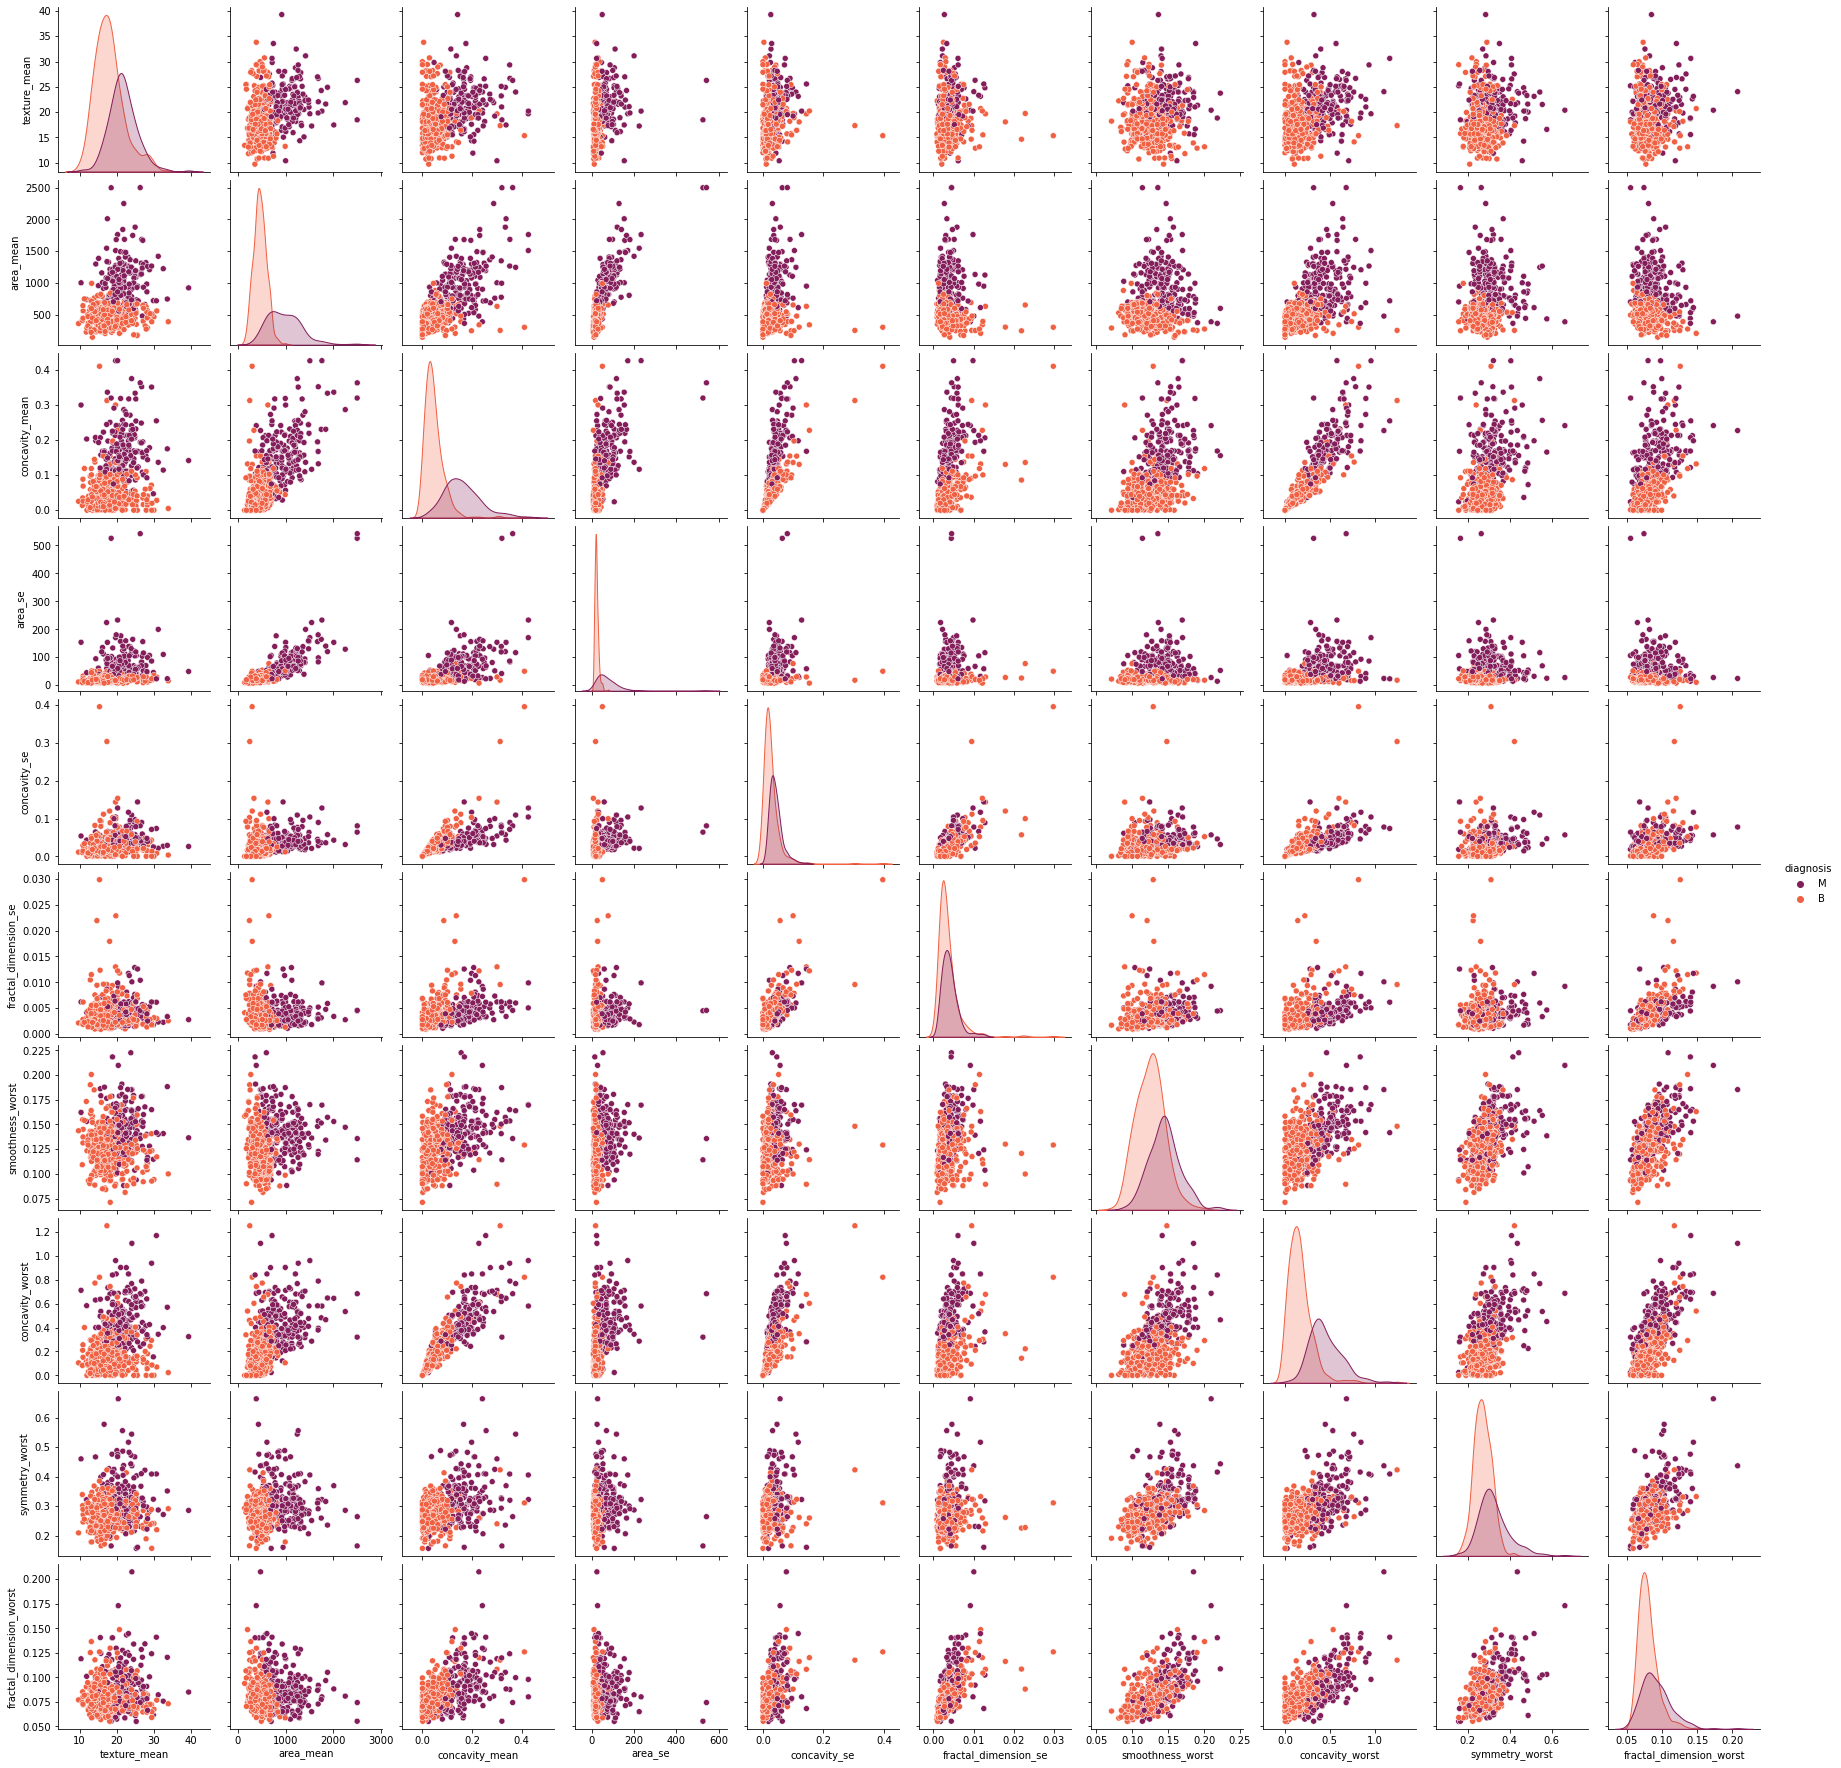

In [26]:
sns.pairplot(df,hue="diagnosis",palette="rocket")

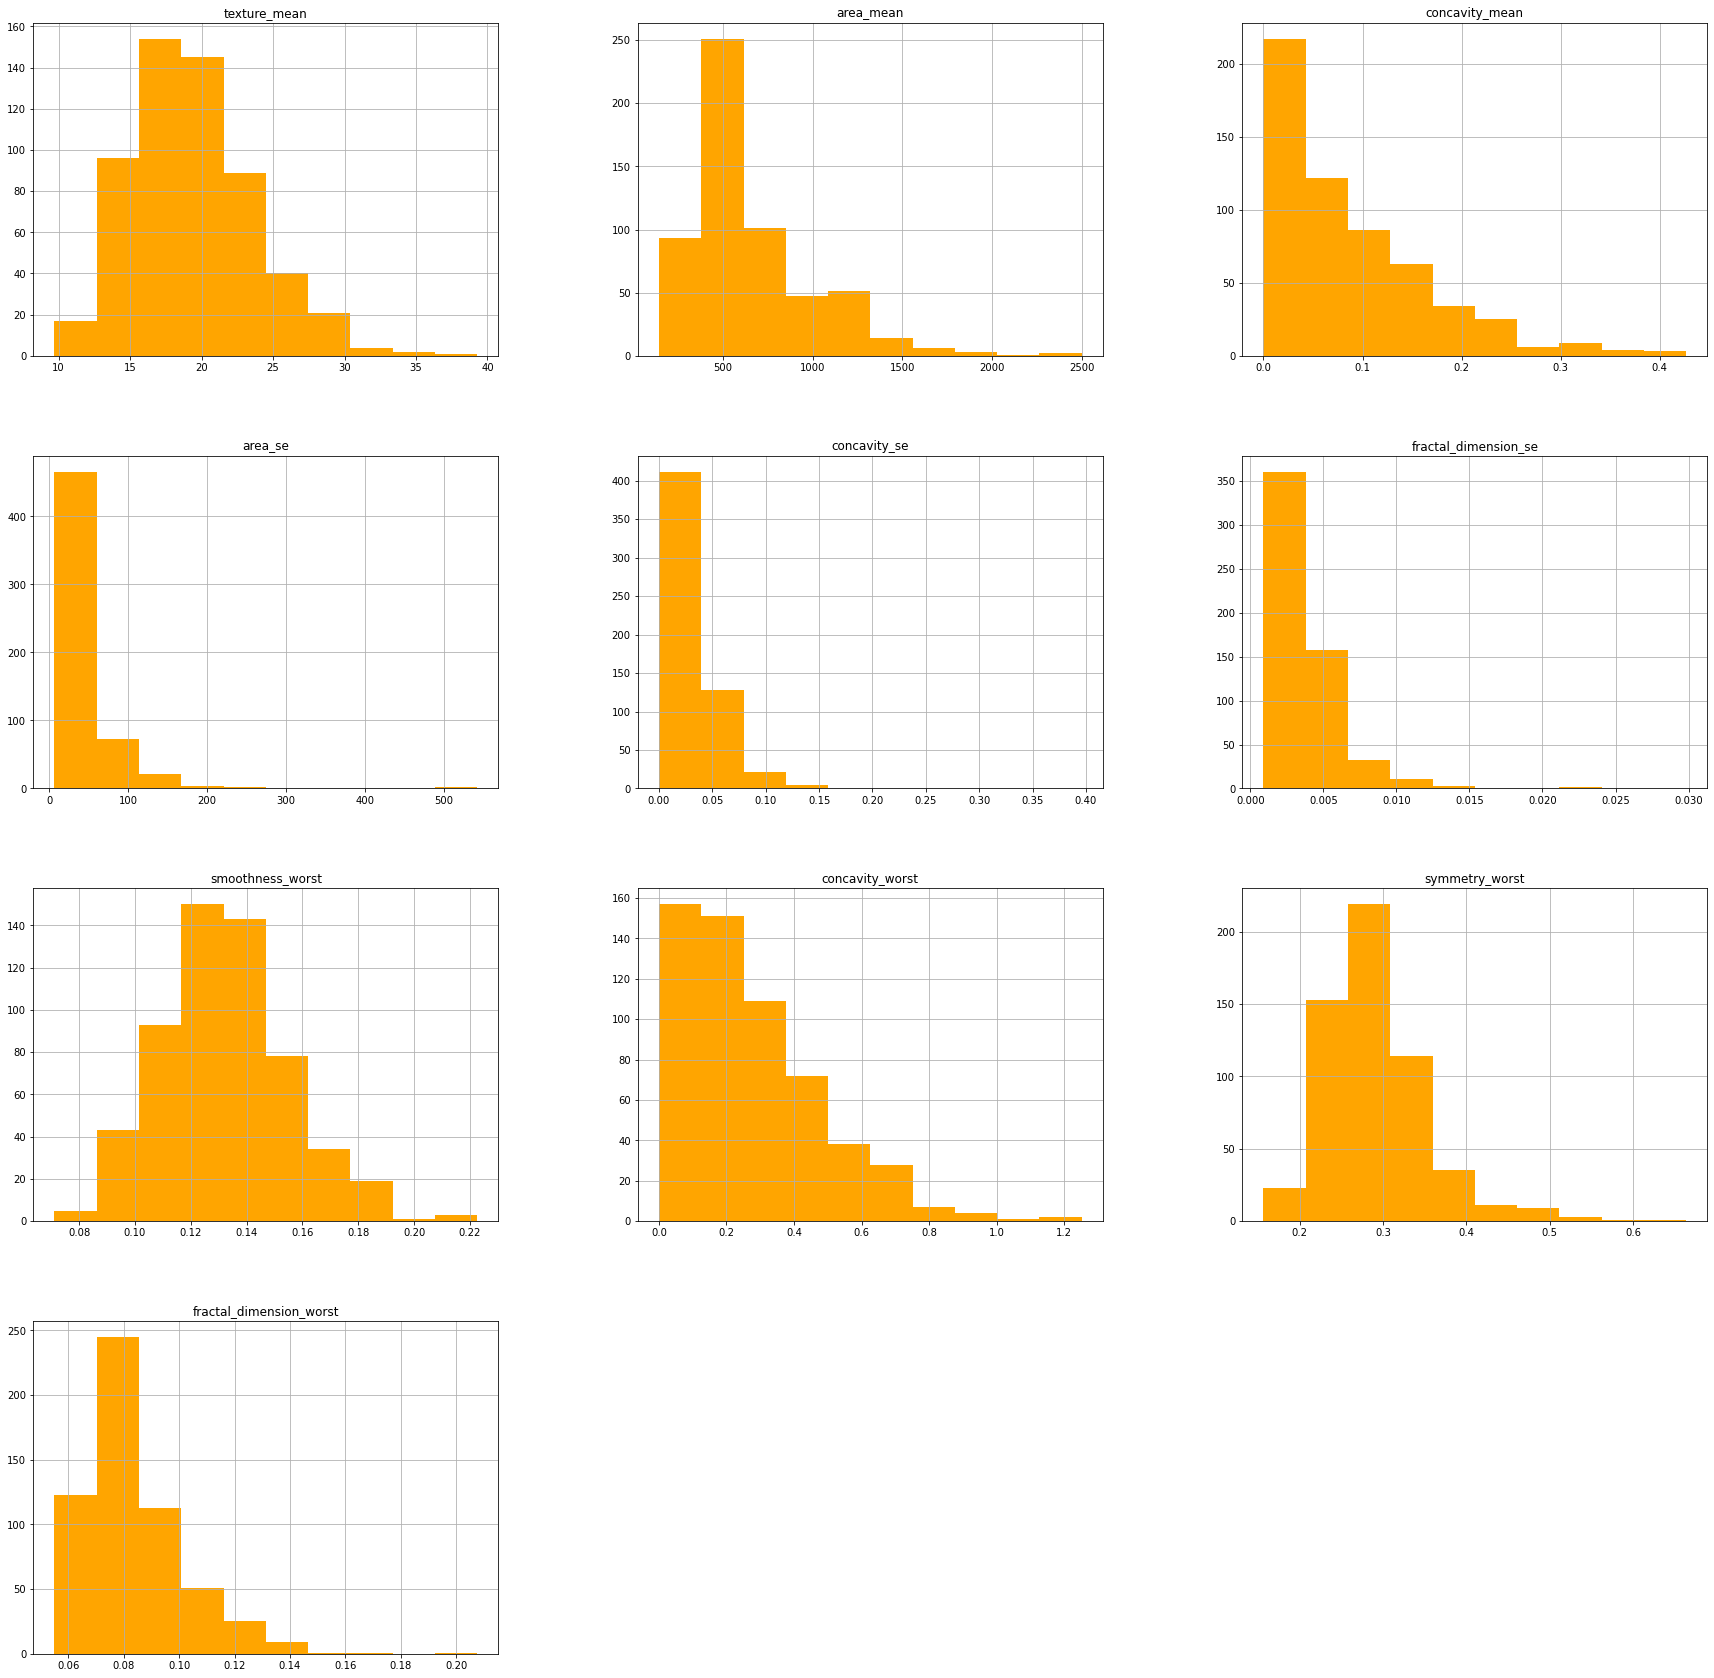

In [27]:
df.hist(figsize = (30,30), color = 'orange')
plt.show()

## Data Pre-Processing

### 1. Missing Values

In [28]:
df.isnull().sum()

diagnosis                  0
texture_mean               0
area_mean                  0
concavity_mean             0
area_se                    0
concavity_se               0
fractal_dimension_se       0
smoothness_worst           0
concavity_worst            0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### 2. Label encoding

In [29]:
# Label encoding is mostly suitable for ordinal data.
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [30]:
df.tail(10)

diagnosis  texture_mean  area_mean  concavity_mean  area_se  concavity_se  \
559         B         23.93      403.5         0.11120    16.97       0.05738   
560         B         27.15      600.4         0.04462    29.84       0.02071   
561         B         29.37      386.0         0.00000    22.81       0.00000   
562         M         30.62      716.9         0.25500    22.65       0.07359   
563         M         25.09     1347.0         0.31740   118.80       0.07845   
564         M         22.39     1479.0         0.24390   158.70       0.05198   
565         M         28.25     1261.0         0.14400    99.04       0.03950   
566         M         28.08      858.1         0.09251    48.55       0.04730   
567         M         29.33     1265.0         0.35140    86.22       0.07117   
568         B         24.54      181.0         0.00000    19.15       0.00000   

     fractal_dimension_se  smoothness_worst  concavity_worst  symmetry_worst  \
559              0.004738           0.12980           0.3630          0.2112   
560              0.005304           0.12410           0.1326          0.2250   
561              0.001773           0.09267           0.0000          0.1566   
562              0.006142           0.14170           1.1700          0.4089   
563              0.006213           0.14070           0.6599          0.2929   
564              0.004239           0.14100           0.4107          0.2060   
565              0.002498           0.11660           0.3215          0.2572   
566              0.003892           0.11390           0.3403          0.2218   
567              0.006185           0.16500           0.9387          0.4087   
568              0.002783           0.08996           0.0000          0.2871   

     fractal_dimension_worst  
559                  0.08732  
560                  0.08321  
561                  0.05905  
562                  0.14090  
563                  0.09873  
564                  0.07115  
565                  0.06637  
566                  0.07820  
567                  0.12400  
568                  0.07039

In [31]:
le = LabelEncoder()
df.diagnosis = le.fit_transform(df.diagnosis)

In [32]:
df.tail(10)

diagnosis  texture_mean  area_mean  concavity_mean  area_se  \
559          0         23.93      403.5         0.11120    16.97   
560          0         27.15      600.4         0.04462    29.84   
561          0         29.37      386.0         0.00000    22.81   
562          1         30.62      716.9         0.25500    22.65   
563          1         25.09     1347.0         0.31740   118.80   
564          1         22.39     1479.0         0.24390   158.70   
565          1         28.25     1261.0         0.14400    99.04   
566          1         28.08      858.1         0.09251    48.55   
567          1         29.33     1265.0         0.35140    86.22   
568          0         24.54      181.0         0.00000    19.15   

     concavity_se  fractal_dimension_se  smoothness_worst  concavity_worst  \
559       0.05738              0.004738           0.12980           0.3630   
560       0.02071              0.005304           0.12410           0.1326   
561       0.00000              0.001773           0.09267           0.0000   
562       0.07359              0.006142           0.14170           1.1700   
563       0.07845              0.006213           0.14070           0.6599   
564       0.05198              0.004239           0.14100           0.4107   
565       0.03950              0.002498           0.11660           0.3215   
566       0.04730              0.003892           0.11390           0.3403   
567       0.07117              0.006185           0.16500           0.9387   
568       0.00000              0.002783           0.08996           0.0000   

     symmetry_worst  fractal_dimension_worst  
559          0.2112                  0.08732  
560          0.2250                  0.08321  
561          0.1566                  0.05905  
562          0.4089                  0.14090  
563          0.2929                  0.09873  
564          0.2060                  0.07115  
565          0.2572                  0.06637  
566          0.2218                  0.07820  
567          0.4087                  0.12400  
568          0.2871                  0.07039

### 3. Train_Test_split

In [33]:
X = df[['texture_mean','area_mean','concavity_mean','area_se','concavity_se','fractal_dimension_se','smoothness_worst','concavity_worst', 'symmetry_worst','fractal_dimension_worst']]
y = df['diagnosis']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

In [35]:
X.shape,y.shape

((569, 10), (569,))

In [36]:
X_train.shape,y_train.shape

((398, 10), (398,))

### 4. Feature Standardization

In [37]:
scaler =StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

## Predictive model using Logistic Regression

In [38]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [39]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [68]:
features_value = [np.array(x_test[0])]

In [69]:
features_name = ['texture_mean','area_mean','concavity_mean','area_se',
                 'concavity_se','fractal_dimension_se','smoothness_worst',
                 'concavity_worst','symmetry_worst','fractal_dimension_worst']
df = pd.DataFrame(features_value, columns=features_name)
output = model.predict(df)
output

array([1])

In [70]:
features_value = [np.array(x_test[1])]
features_name = ['texture_mean','area_mean','concavity_mean','area_se',
                 'concavity_se','fractal_dimension_se','smoothness_worst',
                 'concavity_worst','symmetry_worst','fractal_dimension_worst']
df = pd.DataFrame(features_value, columns=features_name)
output = model.predict(df)
output

array([0])

In [72]:
x_test[0]

array([ 0.31710749, -0.2872433 ,  0.71366732, -0.15500641,  0.11542304,
        0.10246308,  1.08320449,  1.25420187,  1.0939611 ,  1.51560644])

In [73]:
x_test[1]

array([ 1.44727832, -0.33859574, -0.78244669, -0.4783063 , -0.56501333,
       -0.72394135, -0.15805578, -0.67112117, -0.70686766, -0.88310324])

In [40]:
train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
print(f"Training Accuracy = {train_accuracy}\nTesting  Accuracy = {test_accuracy}")

Training Accuracy = 0.9824120603015075
Testing  Accuracy = 0.9649122807017544


In [41]:
np.mean(cross_val_score(lr,X,y,cv=5,scoring="accuracy"))

0.9332557056357708

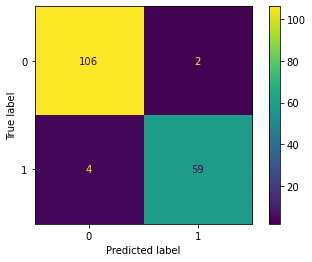

In [42]:
plot_confusion_matrix(lr, x_test, y_test) 
plt.show()

In [24]:
print(classification_report(y_test, y_test_pred ))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [25]:
pickle.dump(lr, open('model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

model = pickle.load(open('model.pkl', 'rb'))
print(model)

LogisticRegression()


In [77]:
import numpy as np
import pickle
import pandas as pd
from flask import Flask, request, render_template

app = Flask(__name__)
model = pickle.load(open('model.pkl', 'rb'))

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict',methods=['POST']) 
def predict():
    input_features = [float(x) for x in request.form.values()]
    features_value = [np.array(input_features)]
    
    features_name = ['texture_mean','area_mean','concavity_mean','area_se',
                     'concavity_se','fractal_dimension_se','smoothness_worst',
                     'concavity_worst','symmetry_worst','fractal_dimension_worst']
    
    df = pd.DataFrame(features_value, columns=features_name)
    output = model.predict(df)
    
    print(df,output)
    if output == 0:
        res_val = "Breast Cancer"
    else:
        res_val = "No Breast Cancer"

    return render_template('index.html', prediction_text='Patient has {}'.format(res_val))

if __name__ == "__main__":
#     app.debug = True
    app.run(port=8080)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Jun/2022 11:33:35] "POST /predict HTTP/1.1" 200 -


   texture_mean  area_mean  concavity_mean   area_se  concavity_se  \
0      1.447278  -0.338596       -0.782447 -0.478306     -0.565013   

   fractal_dimension_se  smoothness_worst  concavity_worst  symmetry_worst  \
0             -0.723941         -0.158056        -0.671121       -0.706868   

   fractal_dimension_worst  
0                -0.883103   [0]
